In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d shuyangli94/food-com-recipes-and-user-interactions


Dataset URL: https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions
License(s): copyright-authors
 99% 265M/267M [00:02<00:00, 102MB/s] 
100% 267M/267M [00:02<00:00, 104MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import zipfile
import os

# Define the path to your zip file and where you want to extract it
zip_file_path = '/content/food-com-recipes-and-user-interactions.zip'
output_directory = './Dataset_MTM'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_directory)

print("Unzipping complete!")


Unzipping complete!


In [ ]:
RAW_recipe=pd.read_csv("/content/Dataset_MTM/RAW_recipes.csv")
RAW_recipe.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
#null values
RAW_recipe.isnull().sum().sum()

4980

In [ ]:
# Remove the recipe containing these abnormal values and check the new size of the data
idx = RAW_recipe[(RAW_recipe['minutes'] == RAW_recipe['minutes'].max()) | (RAW_recipe['minutes'] ==RAW_recipe['minutes'].min())]
recipe2 = RAW_recipe.drop(idx.index)
recipe2.shape

(230542, 12)

In [ ]:
recipe2.isnull().sum().sum()

4315

In [ ]:
recipes=recipe2.fillna(0)

In [ ]:
recipes.isnull().sum().sum()

0

In [ ]:
recipe=pd.read_csv("/content/Dataset_MTM/PP_recipes.csv")
recipe.head(5)

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


In [ ]:
users=pd.read_csv("/content/Dataset_MTM/PP_users.csv")
users.head(5)

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


In [ ]:
interactions=pd.read_csv("/content/Dataset_MTM/RAW_interactions.csv")
interactions.head(5)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [ ]:
interactions_test=pd.read_csv("/content/Dataset_MTM/interactions_test.csv")
interactions_test.head(5)

,user_id,recipe_id,date,rating,u,i
0,8937,44551,2005-12-23,4.0,2,173538
1,56680,126118,2006-10-07,4.0,16,177847
2,349752,219596,2008-04-12,0.0,26,89896
3,628951,82783,2007-11-13,2.0,45,172637
4,92816,435013,2013-07-31,3.0,52,177935


In [ ]:
interactions_train=pd.read_csv("/content/Dataset_MTM/interactions_train.csv")
interactions_train.head(5)

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


In [ ]:
interactions_validation=pd.read_csv("/content/Dataset_MTM/interactions_validation.csv")
interactions_validation.head(5)

,user_id,recipe_id,date,rating,u,i
0,76535,33627,2005-02-15,4.0,5,177317
1,160497,75307,2005-10-24,4.0,23,170785
2,930021,100961,2008-11-30,4.0,31,165555
3,58439,154105,2007-03-24,4.0,44,177453
4,628951,14525,2008-02-16,5.0,45,142367


## Quelles sont les caractéristiques des recettes les plus populaires ?

In [ ]:
# Count number of interactions (reviews) per recipe
recipe_popularity = interactions.groupby('recipe_id').size().reset_index(name='num_reviews')

#rename recipe id
recipes.rename(columns={'id': 'recipe_id'}, inplace=True)

# Merge with recipe details
popular_recipes = pd.merge(recipes, recipe_popularity, on='recipe_id')

# Sort by popularity (num_reviews)
popular_recipes = popular_recipes.sort_values(by='num_reviews', ascending=False)

# View top popular recipes
popular_recipes.head()


,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,num_reviews
22059,best banana bread,2886,65,1762,1999-09-26,"['time-to-make', 'course', 'main-ingredient', ...","[272.8, 16.0, 97.0, 14.0, 7.0, 31.0, 14.0]",13,"['remove odd pots and pans from oven', 'prehea...",you'll never need another banana bread recipe ...,"['butter', 'granulated sugar', 'eggs', 'banana...",8,1613
212796,to die for crock pot roast,27208,545,28201,2002-05-03,"['weeknight', 'time-to-make', 'course', 'main-...","[295.2, 14.0, 0.0, 15.0, 99.0, 19.0, 0.0]",7,"['place beef roast in crock pot', 'mix the dri...","amazing flavor, and so simple! no salt needed ...","['beef roast', 'brown gravy mix', 'dried itali...",5,1601
66356,crock pot chicken with black beans cream cheese,89204,243,137839,2004-04-16,"['time-to-make', 'course', 'main-ingredient', ...","[679.2, 53.0, 39.0, 38.0, 91.0, 75.0, 16.0]",5,"['take 4-5 frozen , yes , frozen , boneless ch...",i love this crock-pot chicken recipe for two r...,"['boneless chicken breasts', 'black beans', 'c...",5,1579
62110,creamy cajun chicken pasta,39087,25,30534,2002-09-02,"['30-minutes-or-less', 'time-to-make', 'course...","[719.1, 63.0, 12.0, 34.0, 78.0, 120.0, 15.0]",4,['place chicken and cajun seasoning in a bowl ...,n'awlin's style of chicken with an updated alf...,"['boneless skinless chicken breast halves', 'l...",12,1448
22278,best ever banana cake with cream cheese frosting,67256,75,82367,2003-07-24,"['weeknight', 'time-to-make', 'course', 'main-...","[503.5, 31.0, 222.0, 15.0, 11.0, 61.0, 25.0]",18,"['preheat oven to 275f', 'grease and flour a 9...",this is one of (if not) the best banana cake i...,"['bananas', 'lemon juice', 'flour', 'baking so...",13,1322


In [ ]:
# Calculate some basic statistics
avg_prep_time = popular_recipes['minutes'].mean()
avg_ingredient_count = popular_recipes['n_ingredients'].mean()

print(f"Average Preparation Time: {avg_prep_time/60} hrs")
print(f"Average Number of Ingredients: {avg_ingredient_count}")


Average Preparation Time: 2.1375248327853495 hrs
Average Number of Ingredients: 9.051799672077106


In [ ]:
"""sns.histplot(popular_recipes['minutes'])
plt.title('Preparation Time Distribution for Popular Recipes')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Number of Recipes')
plt.show()"""



"sns.histplot(popular_recipes['minutes'])\nplt.title('Preparation Time Distribution for Popular Recipes')\nplt.xlabel('Preparation Time (minutes)')\nplt.ylabel('Number of Recipes')\nplt.show()"

## Visualisation des recettes par réduction de dimension pour déterminer les
## recettes qui se rapprochent de celles que l'on a déjà faites

STEP 1 :
eliminate useless features and keep the usefull  

in our case Feature_Selected are name, id , minutes,tags, n_steps, description, ingredients

In [ ]:
print(recipes.columns)

Index(['name', 'recipe_id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')


# USING NUMERICAL COLUMNS

In [ ]:
df1= recipes.drop(columns=['submitted', 'nutrition', 'n_steps', 'steps', 'n_ingredients'])


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
scaler = StandardScaler()
recipe_features = recipes.select_dtypes(include=[np.number])  # Select numerical features only
scaled_features = scaler.fit_transform(recipe_features)


STEP 2
Apply Dimentionality Reducers PCA & t-SNE
  dimensionality reduction techniques, used to reduce the number of features (or dimensions) in a dataset while preserving as much important information as possible.

In [ ]:
# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Add PCA results to the DataFrame
recipes['PCA1'] = pca_result[:, 0]
recipes['PCA2'] = pca_result[:, 1]


Visualize the reduced data

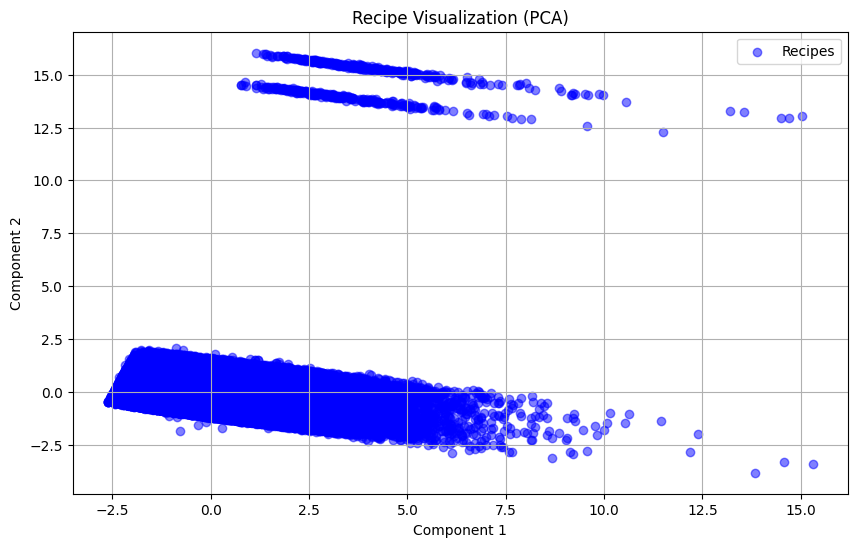

In [ ]:
# Plot PCA or t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(recipes['PCA1'], recipes['PCA2'], c='blue', alpha=0.5, label='Recipes')

# Labels and title
plt.title('Recipe Visualization (PCA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from scipy.spatial.distance import cdist

# Example: Finding recipes similar to a specific recipe (e.g., first recipe in the DataFrame)
target_recipe = pca_result[0]  # Or tsne_result[0] if using t-SNE

# Calculate distances to all other recipes
distances = cdist([target_recipe], pca_result, metric='euclidean')
recipes['Distance_to_Target'] = distances[0]

# Get the top 5 closest recipes
closest_recipes = recipes.nsmallest(5, 'Distance_to_Target')
closest_recipes

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,PCA1,PCA2,Distance_to_Target
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,-0.358567,-0.363931,0.000000
85428,foil chicken asparagus dinners,137604,45,64918,2005-09-15,"['60-minutes-or-less', 'time-to-make', 'main-i...","[433.9, 25.0, 15.0, 42.0, 80.0, 23.0, 9.0]",11,"['preheat oven to 400', 'mix stuffing mix w / ...",i found this in a kraft food magazine. it ori...,"['seasoned stuffing mix', 'water', 'chicken br...",7,-0.358734,-0.364421,0.000518
76464,easy fresh bean garlic and onion saute,137328,10,89831,2005-09-13,"['15-minutes-or-less', 'time-to-make', 'course...","[148.2, 5.0, 23.0, 0.0, 10.0, 2.0, 9.0]",11,['rinse the beans with cold water and trim off...,this is a fantastic and easy recipe to use whe...,"['fresh wax beans', 'olive oil', 'onions', 'fr...",7,-0.359093,-0.365447,0.001605
223452,vietnamese grilled pork tenderloin,137407,510,237330,2005-09-14,"['time-to-make', 'main-ingredient', 'preparati...","[73.0, 0.0, 68.0, 26.0, 1.0, 0.0, 6.0]",11,"['combine the sugar , green onions , garlic , ...",pork tenderloin on the barbecue has never been...,"['pork tenderloin', 'sugar', 'green onion', 'g...",7,-0.358644,-0.365587,0.001658
135576,mikey s cheese tortellini with roasted red pep...,137865,30,237330,2005-09-19,"['30-minutes-or-less', 'time-to-make', 'main-i...","[407.3, 15.0, 28.0, 25.0, 33.0, 21.0, 21.0]",11,['fill a large pot with hot water and set to b...,i came up with this easy time-saver when i was...,"['cheese tortellini', 'olive oil', 'onion', 'r...",7,-0.358134,-0.361921,0.002055


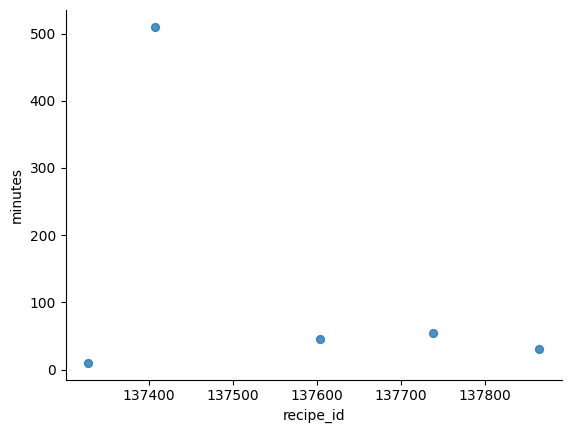

In [ ]:
# @title recipe_id vs minutes

from matplotlib import pyplot as plt
closest_recipes.plot(kind='scatter', x='recipe_id', y='minutes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

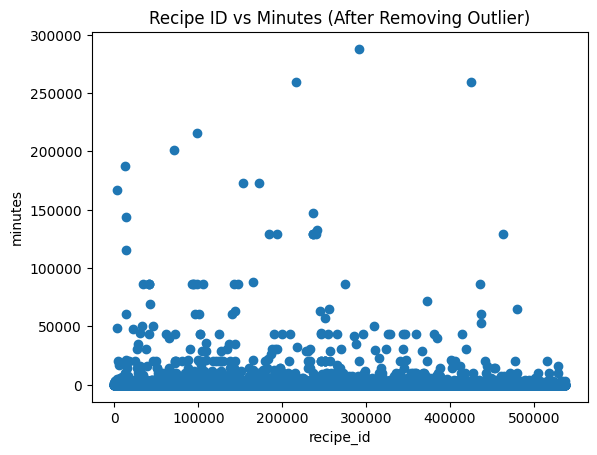

In [ ]:
# Set the abnormal value to the maximum value in the 'minutes' column
abnormal_value = 510

# Identify the index of the row containing this abnormal value
index_of_abnormal = recipes[recipes['minutes'] >= recipes['minutes'] .max()].index

# Drop the row from the DataFrame
recipes_cleaned = recipes.drop(index_of_abnormal)

# Verify the row with the abnormal value has been dropped
recipes_cleaned
# Now plot again without the abnormal value
plt.scatter(recipes_cleaned['recipe_id'], recipes_cleaned['minutes'])
plt.xlabel('recipe_id')
plt.ylabel('minutes')
plt.title('Recipe ID vs Minutes (After Removing Outlier)')
plt.show()

In [ ]:
"""# Remove the recipe containing these abnormal values and check the new size of the data
ind = recipes[(recipes['minutes'] == recipes['minutes'].max()) | (recipes['minutes'] ==recipes['minutes'].min())]
recipe3 = recipes.drop(ind.index)
recipe3.shape"""

"# Remove the recipe containing these abnormal values and check the new size of the data\nind = recipes[(recipes['minutes'] == recipes['minutes'].max()) | (recipes['minutes'] ==recipes['minutes'].min())]\nrecipe3 = recipes.drop(ind.index)\nrecipe3.shape"

In [ ]:
scaler = StandardScaler()
recipe_features = recipes_cleaned.select_dtypes(include=[np.number])  # Select numerical features only
scaled_features2 = scaler.fit_transform(recipe_features)


In [ ]:
# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
pca_result2 = pca.fit_transform(scaled_features2)

# Add PCA results to the DataFrame
recipes_cleaned['PCA1'] = pca_result2[:, 0]
recipes_cleaned['PCA2'] = pca_result2[:, 1]


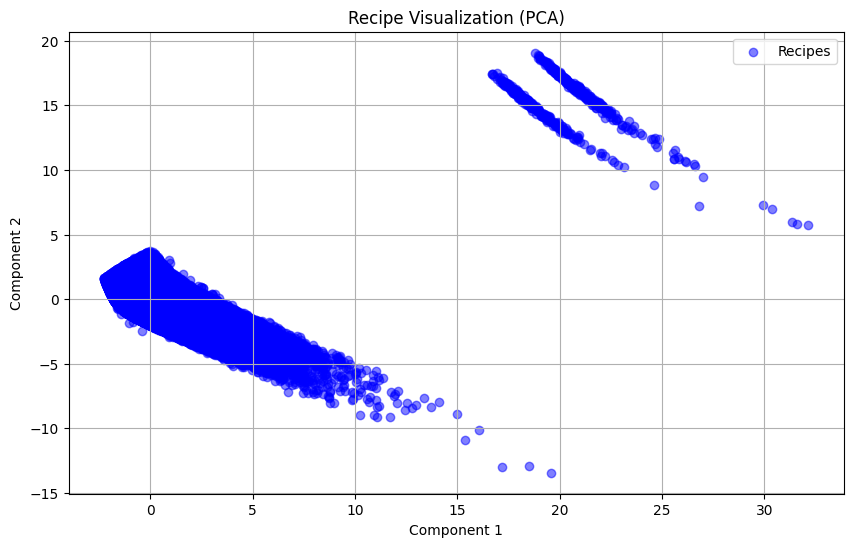

In [ ]:
# Plot PCA or t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(recipes_cleaned['PCA1'], recipes_cleaned['PCA2'], c='blue', alpha=0.5, label='Recipes')

# Labels and title
plt.title('Recipe Visualization (PCA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from scipy.spatial.distance import cdist

# Example: Finding recipes similar to a specific recipe (e.g., first recipe in the DataFrame)
target_recipe2 = pca_result2[0]  # Or tsne_result[0] if using t-SNE

# Calculate distances to all other recipes
distances = cdist([target_recipe2], pca_result2, metric='euclidean')
recipes_cleaned['Distance_to_Target'] = distances[0]

# Get the top 5 closest recipes
closest_recipes = recipes_cleaned.nsmallest(5, 'Distance_to_Target')
closest_recipes

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,PCA1,PCA2,Distance_to_Target
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,-1.130578,-0.277681,0.000000
85428,foil chicken asparagus dinners,137604,45,64918,2005-09-15,"['60-minutes-or-less', 'time-to-make', 'main-i...","[433.9, 25.0, 15.0, 42.0, 80.0, 23.0, 9.0]",11,"['preheat oven to 400', 'mix stuffing mix w / ...",i found this in a kraft food magazine. it ori...,"['seasoned stuffing mix', 'water', 'chicken br...",7,-1.130764,-0.277988,0.000359
76464,easy fresh bean garlic and onion saute,137328,10,89831,2005-09-13,"['15-minutes-or-less', 'time-to-make', 'course...","[148.2, 5.0, 23.0, 0.0, 10.0, 2.0, 9.0]",11,['rinse the beans with cold water and trim off...,this is a fantastic and easy recipe to use whe...,"['fresh wax beans', 'olive oil', 'onions', 'fr...",7,-1.131184,-0.278596,0.001098
162130,pollo al ajillo,136957,35,163112,2005-09-11,"['60-minutes-or-less', 'time-to-make', 'course...","[873.3, 107.0, 1.0, 8.0, 107.0, 79.0, 1.0]",11,"['heat oil in large skillet', 'add chicken pie...",spanish chicken in garlic sauce,"['olive oil', 'chicken', 'salt', 'garlic', 'wa...",7,-1.131586,-0.279567,0.002139
223452,vietnamese grilled pork tenderloin,137407,510,237330,2005-09-14,"['time-to-make', 'main-ingredient', 'preparati...","[73.0, 0.0, 68.0, 26.0, 1.0, 0.0, 6.0]",11,"['combine the sugar , green onions , garlic , ...",pork tenderloin on the barbecue has never been...,"['pork tenderloin', 'sugar', 'green onion', 'g...",7,-1.130259,-0.280146,0.002485


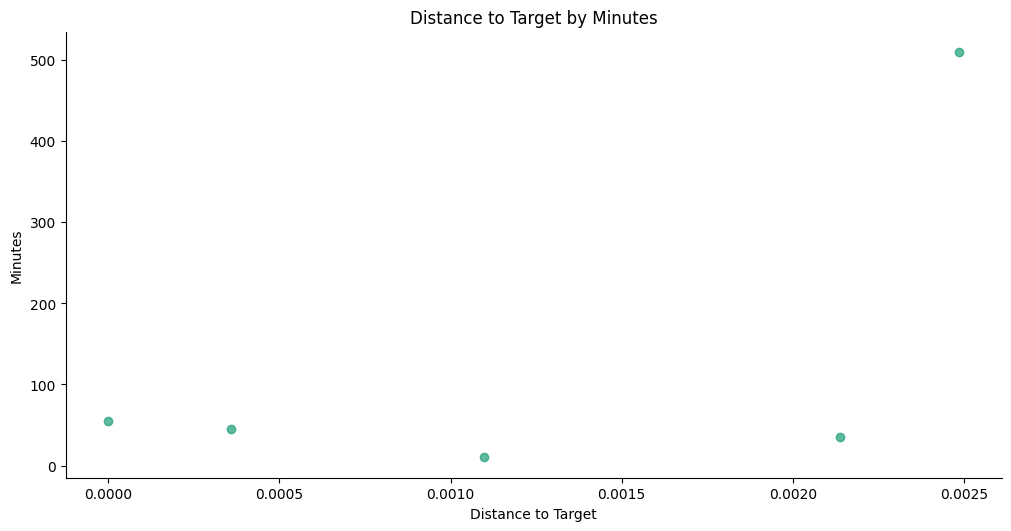

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Define the function to plot the series
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.color_palette('Dark2', n_colors=len(series)))
    xs = series['Distance_to_Target']
    ys = series['minutes']

    # Plot each series with a specific color
    plt.scatter(xs, ys, label=series_name, color=palette[series_index % len(palette)], alpha=0.7)

# Create a new figure for the plot
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# Sort the dataframe by 'Distance_to_Target'
df_sorted = closest_recipes.sort_values('Distance_to_Target', ascending=True)

# Plot all data points
_plot_series(df_sorted, 'Recipes')

# Customize the plot
plt.title('Distance to Target by Minutes')
plt.xlabel('Distance to Target')
plt.ylabel('Minutes')

# Remove top and right spines for a cleaner look
sns.despine(fig=fig, ax=ax)

# Show the plot
plt.show()


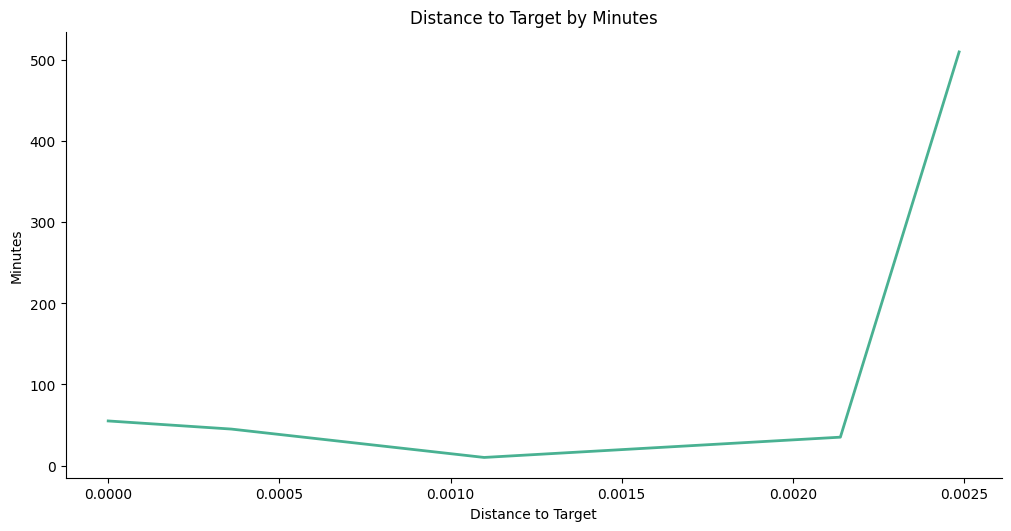

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Define the function to plot the series
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.color_palette('Dark2', n_colors=len(series)))
    xs = series['Distance_to_Target']
    ys = series['minutes']

    # Plot each series with a line plot
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)], alpha=0.8, linewidth=2)

# Create a new figure for the plot
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# Sort the dataframe by 'Distance_to_Target'
df_sorted = closest_recipes.sort_values('Distance_to_Target', ascending=True)

# Plot the sorted data
_plot_series(df_sorted, 'Recipes')

# Customize the plot
plt.title('Distance to Target by Minutes')
plt.xlabel('Distance to Target')
plt.ylabel('Minutes')

# Remove top and right spines for a cleaner look
sns.despine(fig=fig, ax=ax)

# Display the plot
plt.show()


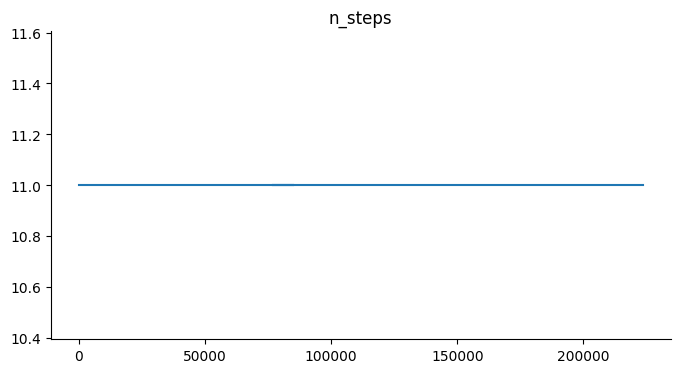

In [ ]:
# @title n_steps

from matplotlib import pyplot as plt
closest_recipes['n_steps'].plot(kind='line', figsize=(8, 4), title='n_steps')
plt.gca().spines[['top', 'right']].set_visible(False)